NAME: DEV AGARWAL REG NO: 220968019 SECTION: A ROLL NO: 06 BATCH: 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math

In [2]:
data = pd.read_csv('forestfires.csv')
df = pd.DataFrame(data)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


UNDERSTANDING THE DATA

In [3]:
df.shape

(517, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
df = df.drop_duplicates()

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

MULTIPLE LINEAR REGRESSION

In [8]:
df1 = df.drop(columns = ['month','day'])

In [9]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
df_scaled

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.750,0.428571,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.750,0.285714,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.750,0.285714,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.875,0.571429,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.875,0.571429,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
508,0.375,0.142857,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
509,0.125,0.285714,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
510,0.750,0.285714,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
511,0.000,0.285714,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


In [10]:
x,y = train_test_split(df_scaled, test_size = 0.3, random_state = 0)

In [11]:
x_train = x.drop(columns = ['area'])
y_train = x[['area']]
x_test = y.drop(columns = ['area'])
y_test = y[['area']]

In [12]:
reg = LinearRegression()

In [13]:
reg.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = reg.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

ERROR CALCULATION

In [16]:
mse = mean_squared_error(y_test,y_pred)
print("mean squared error: ",mse)
rmse  = math.sqrt(mse)
print("root mean square error: ",rmse)
mae = mean_absolute_error(y_test,y_pred)
print("mean absolute error: ",mae)

mean squared error:  0.00999948870753476
root mean square error:  0.09999744350499547
mean absolute error:  0.023200287411251515


In [17]:
y_pred

array([[ 0.00961813],
       [ 0.00373897],
       [ 0.00537948],
       [ 0.00401137],
       [ 0.00561785],
       [ 0.00905949],
       [ 0.00754767],
       [ 0.00939661],
       [ 0.01024729],
       [ 0.00722519],
       [ 0.01043218],
       [ 0.00865772],
       [ 0.01091748],
       [ 0.00979982],
       [ 0.00142304],
       [ 0.0115129 ],
       [ 0.01046789],
       [-0.00730888],
       [ 0.00421472],
       [ 0.00439757],
       [ 0.00772232],
       [ 0.00389712],
       [ 0.00507138],
       [ 0.01368186],
       [ 0.00542915],
       [ 0.0081638 ],
       [ 0.00463027],
       [ 0.01131172],
       [ 0.00801404],
       [ 0.00214843],
       [ 0.01003853],
       [ 0.00673945],
       [ 0.01052636],
       [ 0.00459208],
       [ 0.00195506],
       [ 0.00334948],
       [ 0.00389649],
       [ 0.00509475],
       [ 0.00700755],
       [ 0.0061416 ],
       [ 0.00577834],
       [ 0.00813042],
       [ 0.00913269],
       [ 0.00322137],
       [ 0.00844085],
       [ 0

LINEAR REGRESSION

In [18]:
df.corr()['area']

C:\Users\DELL\AppData\Local\Temp\ipykernel_20252\3618409279.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['area']


X       0.062930
Y       0.045168
FFMC    0.040232
DMC     0.073783
DC      0.050313
ISI     0.008411
temp    0.098222
RH     -0.075460
wind    0.012699
rain   -0.007418
area    1.000000
Name: area, dtype: float64

In [19]:
df2 = df_scaled[['DMC','area']]

In [20]:
X,Y = train_test_split(df2, test_size = 0.3, random_state = 0)

In [21]:
X_train = X[['DMC']]
Y_train = X[['area']]
X_test = Y[['DMC']]
Y_test = Y[['area']]

In [22]:
regressor = LinearRegression()

In [23]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [24]:
Y_pred = regressor.predict(X_test)

In [25]:
Y['predicted_area'] = Y_pred

ERROR CALCULATION

In [26]:
MSE = mean_squared_error(Y_test,Y_pred)
print("mean squared error: ",MSE)
RMSE  = math.sqrt(MSE)
print("root mean square error: ",RMSE)
MAE = mean_absolute_error(Y_test,Y_pred)
print("mean absolute error: ",MAE)

mean squared error:  0.010044697309757976
root mean square error:  0.10022323737416376
mean absolute error:  0.023222162073888043


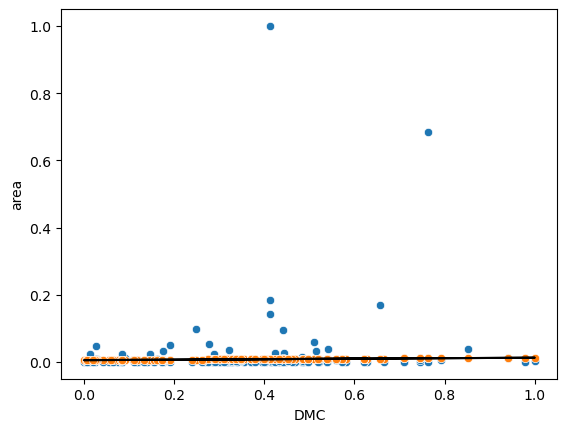

In [27]:
sns.scatterplot(x = 'DMC',y = 'area', data = Y)
sns.scatterplot(x = 'DMC',y = 'predicted_area', data = Y)
plt.plot(Y['DMC'], Y['predicted_area'], color = 'black')
plt.show()

In [28]:
Y

,DMC,area,predicted_area
283,0.627154,0.000000,0.009827
100,0.369400,0.000000,0.007938
37,0.139214,0.000000,0.006251
46,0.432116,0.000000,0.008398
374,0.061337,0.000000,0.005681
...,...,...,...
4,0.172984,0.000000,0.006499
326,0.348725,0.006032,0.007787
249,0.538249,0.000193,0.009176
254,0.400069,0.000623,0.008163
